In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
##fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


## Scatter Plot
### Matplotlib

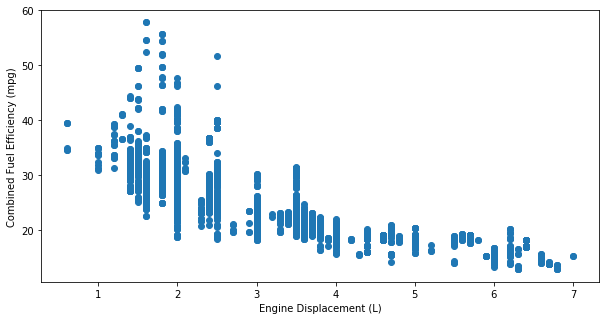

In [8]:
plt.figure(figsize = (10,5))
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Seaborn Regplot

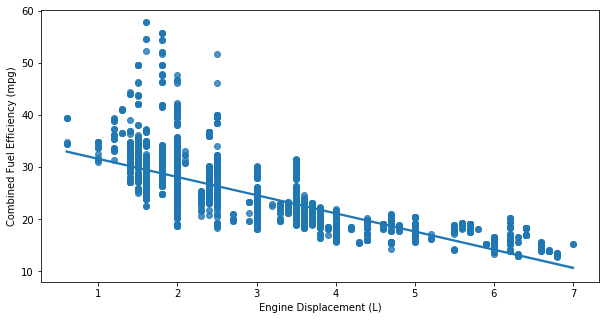

In [10]:
plt.figure(figsize = (10,5))
sns.regplot(data = fuel_econ, x = 'cyl', y = 'comb')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Seaborn Scatter plot

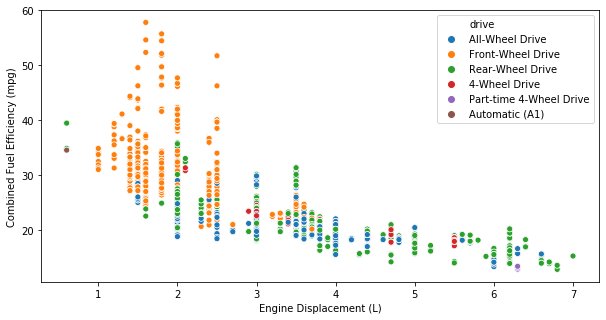

In [27]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = fuel_econ, x = 'displ', y = 'comb',hue = 'drive')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Using log of y 

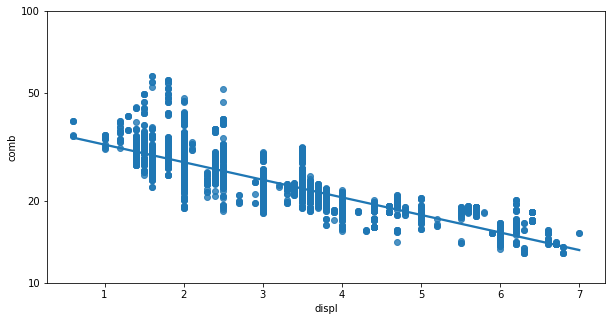

In [19]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
plt.figure(figsize = (10,5))
sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

### Transparency and Jitter
Note that the below X values are discrete, leaving lots of overlapping points in each band

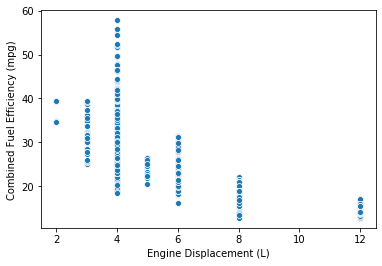

In [29]:
sns.scatterplot(data = fuel_econ, x = 'cylinders', y = 'comb')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

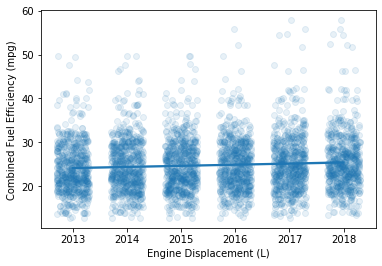

In [44]:
sns.regplot(data = fuel_econ, x = 'year', y = 'comb',x_jitter=0.3,
           scatter_kws = {'alpha':0.1});
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

For plt.scatter we just use alpha = 0.1 instead of referring to scatter_kws with a dictionary

#### Example from course with suplots

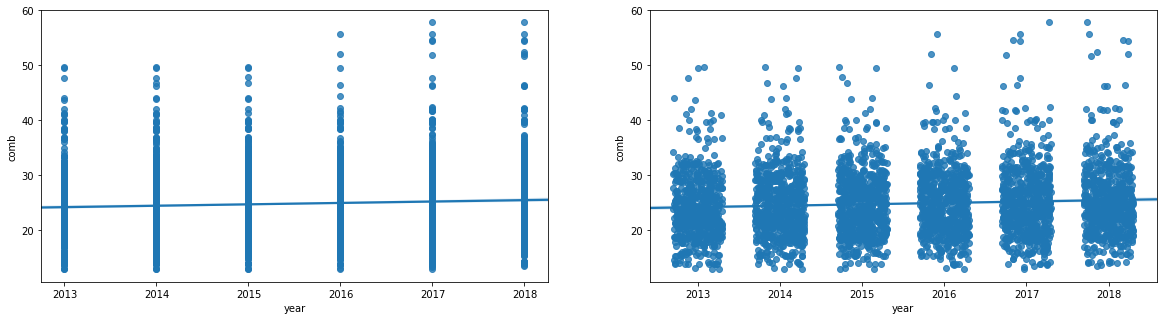

In [47]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);
